# Principal Component Analysis (PCA)
Principal Component Analysis (PCA) is a statistical technique commonly used in data analysis and machine learning for dimensionality reduction while maintaining as much variability as possible. PCA identifies the directions (principal components) along which the variance of the data is maximized, effectively uncovering the underlying structure of the data.

## How PCA Works
### Mathematical Foundation
PCA transforms the original data into a new set of variables, the principal components, which are linear combinations of the original variables. These new components are orthogonal to each other, and each successive component captures a decreasing amount of the remaining variance.

Covariance Matrix: PCA starts by calculating the covariance matrix of the data, which helps in understanding how each variable in the data relates to the others. The covariance matrix Σ for a data matrix X with zero empirical mean (where the mean of each variable has been subtracted) is given by:
$$
\Sigma = \frac{1}{n-1} X^T X
$$
where $X$ is an $n$ x $d$ matrix with $n$ observations and $d$ variables.


Eigen Decomposition: PCA involves computing the eigenvalues and eigenvectors of the covariance matrix. The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

Formulation
The principal components are obtained by solving:
$$
\Sigma v_i = \lambda_i v_i
$$
where $v_i$ are the eigenvectors and $\lambda_i$ are the eigenvalues.



The first principal component is the direction along which the variance of the data is maximized. This is followed by the second principal component which is orthogonal to the first and captures the next highest variance, and so on.

## Key Steps in PCA
1. Standardization: Typically, the data are standardized (mean-subtracted and scaled by standard deviation) to give each variable equal weight.

2. Covariance Matrix Computation: Compute the covariance matrix to understand how variables vary together.

3. Eigen Decomposition: Calculate the eigenvalues and eigenvectors of the covariance matrix to identify the principal components.

4. Component Selection: Choose the number of principal components based on the cumulative explained variance, which helps in understanding how much information (variance) is captured by each component.

5. Projection: Project the original data onto the space spanned by the selected principal components.

## Applications and Benefits
Dimensionality Reduction: PCA is widely used for reducing the dimensions of large datasets, simplifying the data and reducing the computational load for subsequent analysis.

Visualization: With reduced dimensions (often just two or three principal components), PCA allows for the visualization of complex multivariate data.

Noise Reduction: By eliminating components with low variance and retaining those that contribute significantly to the data's variance, PCA can help in filtering out noise.

Feature Extraction and Engineering: PCA transforms correlated variables into a smaller number of uncorrelated variables, simplifying the models that consume this data.

Now let's apply this to both Classification (Breast Cancer Dataset) and Regression (Real Estate Dataset).

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [8]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

X = X.values
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = y.values
y = np.where(y == 'B', 0, 1)
y = y.ravel()

In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Check the explained variance ratio
print(pca.explained_variance_ratio_)

[0.44272026 0.18971182]


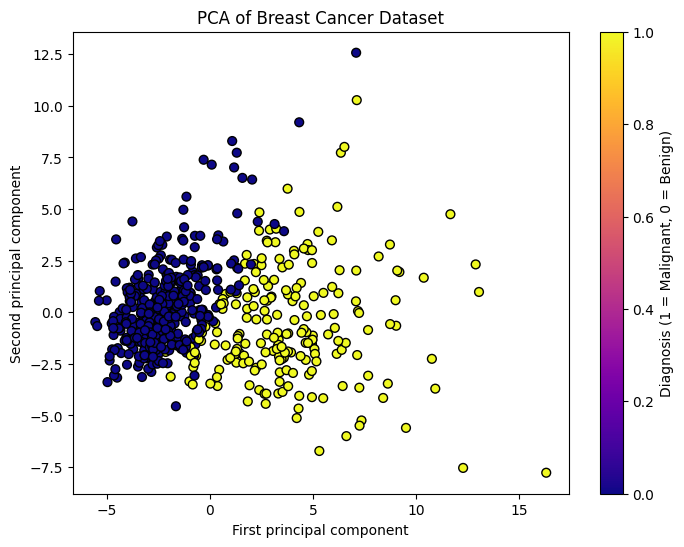

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='plasma', edgecolor='k', s=40)
plt.title('PCA of Breast Cancer Dataset')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.colorbar(label='Diagnosis (1 = Malignant, 0 = Benign)')
plt.show()

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

scores = []
for n in range(1, min(len(X), 21)):  # Check up to 20 components or max available
    pipe = make_pipeline(PCA(n_components=n), LinearRegression())
    score = cross_val_score(pipe, X, y, cv=5, scoring='neg_mean_squared_error')
    scores.append(np.mean(score))

best_n = np.argmax(scores) + 1  # Adding 1 because index starts at 0
print("Best number of components by CV: ", best_n)

Best number of components by CV:  19


In [13]:
pca = PCA(n_components=best_n)
X_pca = pca.fit_transform(X)

# Check the explained variance ratio
print(pca.explained_variance_ratio_)

[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978 0.00979719 0.00870538
 0.00804525 0.00523366 0.00313783 0.00266209 0.00197997 0.00175396
 0.00164925]


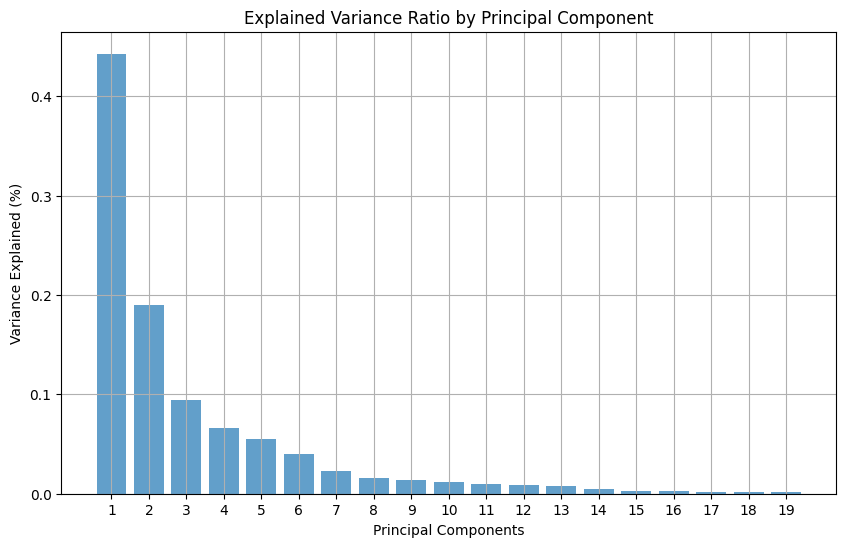

In [14]:
import matplotlib.pyplot as plt

# Plotting the explained variance ratio
plt.figure(figsize=(10, 6))
components = range(1, len(pca.explained_variance_ratio_) + 1)
plt.bar(components, pca.explained_variance_ratio_, alpha=0.7, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained (%)')
plt.title('Explained Variance Ratio by Principal Component')
plt.xticks(components)
plt.grid(True)
plt.show()

In [17]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
real_estate_valuation = fetch_ucirepo(id=477)

# data (as pandas dataframes)
X = real_estate_valuation.data.features
y = real_estate_valuation.data.targets

X = X.values
X = scaler.fit_transform(X)
y = y.values

In [18]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Check the explained variance ratio
print(pca.explained_variance_ratio_)

[0.4457321  0.17457136]


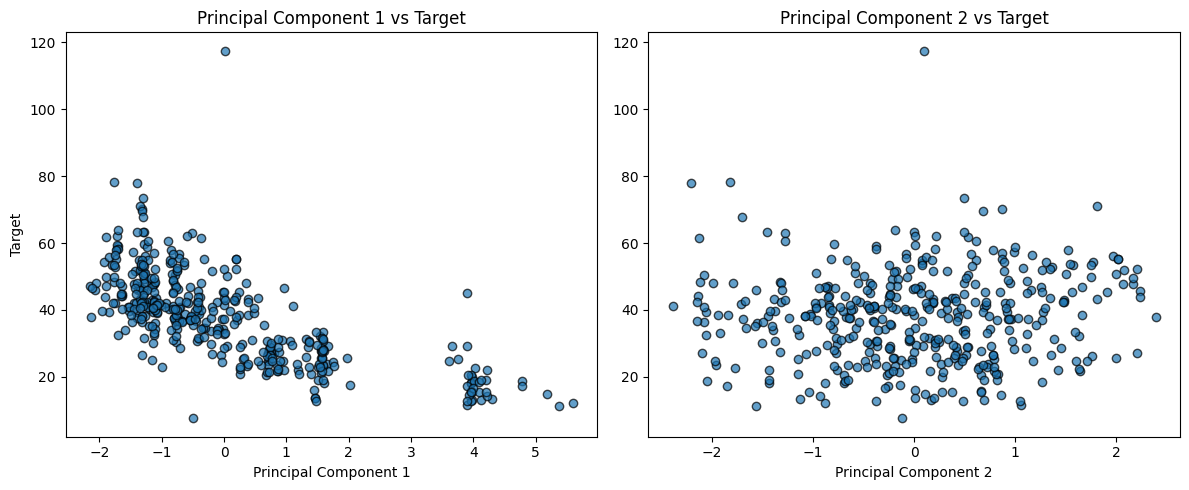

In [19]:
plt.figure(figsize=(12, 5))

# Scatter plot for Principal Component 1 vs Target
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(X_pca[:, 0], y, edgecolor='k', alpha=0.7)
plt.title('Principal Component 1 vs Target')
plt.xlabel('Principal Component 1')
plt.ylabel('Target')

# Scatter plot for Principal Component 2 vs Target
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.scatter(X_pca[:, 1], y, edgecolor='k', alpha=0.7)
plt.title('Principal Component 2 vs Target')
plt.xlabel('Principal Component 2')

plt.tight_layout()
plt.show()
